# Arbitrary numbers of dimensions

Here we interpolate on the hyperrectangle. 

In [1]:
using LaplaceInterpolation, Random, Plots
Random.seed!(1234);

Using rather arbitrary data for now, we generate a 4 dimensional dataset.

In [2]:
# generate data
Nx = Ny = Nz = Nw = 11
data = [sin(2*pi*x)*cos(2*pi*y*0.1)*z^2*w^2 for x in LinRange(1,10,Nx) for y in LinRange(1,10,Ny) for z in LinRange(1,10,Nz) for w in LinRange(1,10,Nw)]
data = reshape(data, Nx, Ny, Nz, Nw)

totalsize = Nx*Ny*Nz*Nw
discard = randperm(totalsize)[1:Int64(round(totalsize/2))];

Compute and time the Laplace interpolation of these data.

In [3]:
# Laplace interpolation
@time interped = interp(data, discard, 1, 0.0, (0.1, 0.1, 0.1, 0.1))
# about 20 seconds 

 22.056815 seconds (7.45 M allocations: 20.612 GiB, 4.77% gc time)


11×11×11×11 Array{Float64,4}:
[:, :, 1, 1] =
   5.47971e-13   -4.54747e-15  …    -20.937          -31.0942
  -1.43031       -2.14354            -8.44466e-12    -38.0078
  -1.82856        1.55132e-11        -5.69798e-12      1.52068e-11
  -1.97238        9.92259e-12      -124.777         -203.546
  -1.57956e-11   -2.32314e-11         3.90485e-11   -241.953
  -5.79214e-11   -8.19804      …   -346.782            3.73584e-11
  -8.11631e-15   -1.09537e-10      -600.105         -702.936
   2.75304e-11   -1.9063e-11       -865.661         -905.049
  -9.30827        1.2169e-11       -725.094           -8.31416e-11
  -2.93221e-11   -1.09976e-10      -837.09             1.69509e-10
 -30.2182       -35.7341       …  -1625.19         -1852.09

[:, :, 2, 1] =
  -0.13092      -0.527916     …     2.57387e-11    -17.8793
   1.13492e-13  -1.0583           -18.1547         -29.6089
   1.29985e-12   5.19549e-12      -32.126          -35.4192
  -1.52338       1.3509e-11       -57.4577          -1.17958e-1

Compute and time the Matern interpolation with m = 2, $\epsilon = 0.1$.

In [4]:
# Matern interpolation
m = 2
epsilon = 0.1
aspect_ratios = (0.1, 0.1, 0.1, 0.1)
@time mat_interped = interp(data, discard, m, epsilon, aspect_ratios)
# About 50 seconds

 50.468044 seconds (3.07 M allocations: 21.986 GiB, 2.32% gc time)


11×11×11×11 Array{Float64,4}:
[:, :, 1, 1] =
  4.05275e-7   1.30548e-6    0.277529    …      6.13398         6.25885
  0.306967    -0.259197     -0.691176           1.16627e-6     -3.30347
  0.780473     5.65581e-7   -0.832865           5.93596e-8      9.85299e-7
  1.13288     -2.27298e-7   -6.88566e-7       -46.0121       -104.434
  2.08314e-7   1.34576e-7   -8.25114           -5.85536e-8    -88.5356
  1.31377e-7  -1.03128      -2.91942e-7  …   -158.305           1.08672e-7
  2.46302e-7  -5.43112e-7   -1.50717e-7      -444.574        -586.369
  5.69668e-7  -4.13708e-8  -24.9159          -623.763        -685.461
  4.48261     -1.70703e-7  -28.4087          -377.772           4.26466e-8
 -7.42618e-9  -7.18259e-8  -42.4889          -490.175          -1.2926e-7
 -2.12083     -1.19096      -1.96305e-8  …  -1386.29        -1615.65

[:, :, 2, 1] =
  0.0812955    0.174189      0.272907    …    -2.61971e-6     0.805384
  2.24659e-7  -0.0723573    -0.235692         -5.06034       -7.49409
 -2.3

## Results

What does the result of the fast interpolation look like in one of the planes?

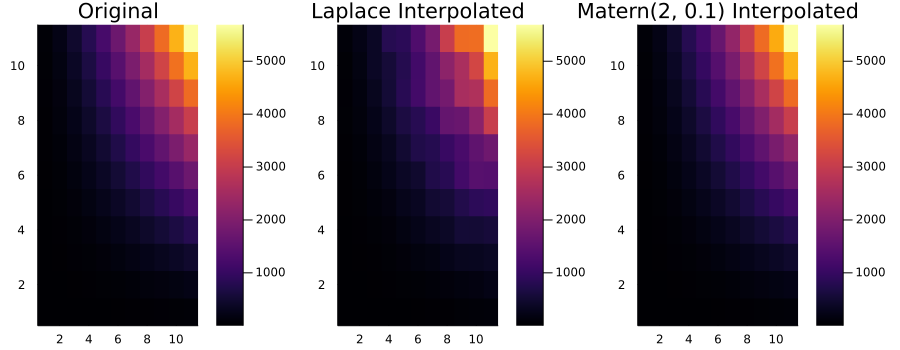

In [5]:
i, j = (5, 5)
cl = (minimum(data[:,:,i,j]), maximum(data[:,:,i,j]))

po = heatmap(data[:,:,i,j], title = "Original", clims = cl)
pl = heatmap(interped[:,:,i,j], title = "Laplace Interpolated", clims = cl) 
pm = heatmap(mat_interped[:,:,i,j], title = "Matern($m, $epsilon) Interpolated", clims = cl)

plot(po, pl, pm, layout = (1,3), size = (900, 350))

## Relative error

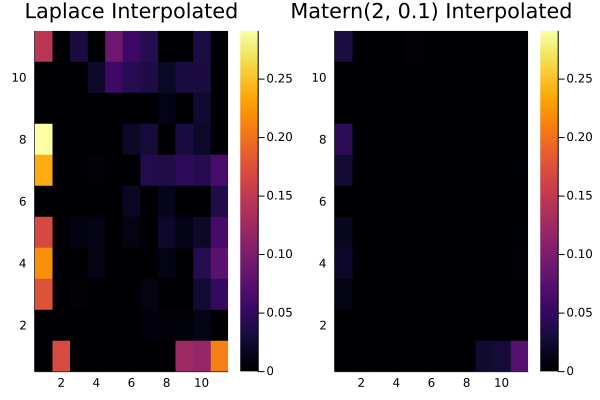

In [6]:
le = abs2.((interped[:,:,i,j] .- data[:,:,i,j])./data[:,:,i,j])
me = abs2.((mat_interped[:,:,i,j] .- data[:,:,i,j])./data[:,:,i,j])

cl = (minimum(le), maximum(le))

ple = heatmap(le, title = "Laplace Interpolated", clims = cl) 
pme = heatmap(me, title = "Matern($m, $epsilon) Interpolated", clims = cl)

plot(ple, pme, layout = (1,2))